In [51]:
import tensorflow as tf

In [52]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [53]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [54]:
x_test=x_test/255
x_train=x_train/255

In [55]:
len(x_test),len(x_train)

(10000, 60000)

In [56]:
x_train[0].shape

(28, 28)

In [57]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

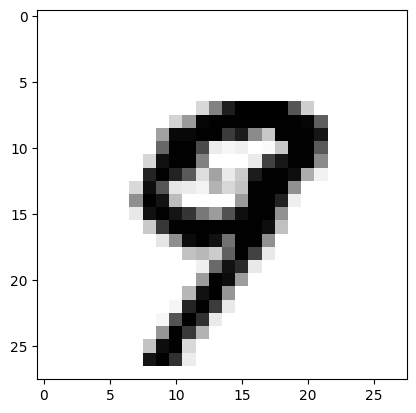

In [58]:
plt.imshow(x_train[87],cmap='binary')

In [59]:
x_train.shape

(60000, 28, 28)

In [60]:
x_train_flatter=x_train.reshape(len(x_train),784)
x_test_flatter=x_test.reshape(len(x_test),784)
x_train_flatter.shape
x_test_flatter.shape

(10000, 784)

In [61]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(500, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

c:\Users\praka\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [63]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [64]:
model.fit(x_train_flatter,y_train,epochs=5,callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8899 - loss: 0.3727
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9703 - loss: 0.0967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9807 - loss: 0.0603
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0450
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9882 - loss: 0.0366


In [65]:
sample=x_test[0]

In [66]:
sample = sample.reshape(1, 28*28)

In [67]:
prediction = model.predict(x_test_flatter)




313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [68]:
y_pred_label=[]

In [69]:
y_pred_label=np.append(y_pred_label,[np.argmax(i) for i in prediction])

In [70]:
y_pred_label.astype('int64')

array([7, 2, 1, ..., 4, 5, 6])

In [71]:
np.argmax(prediction[87])

np.int64(3)

In [72]:
y_test[87]

np.uint8(3)

In [73]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_label)

In [74]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    1,    0,    2,    0,    3,    7,    2,    2,    3],
       [   0, 1127,    0,    1,    0,    0,    4,    1,    2,    0],
       [   4,    3, 1005,    8,    1,    0,    3,    3,    5,    0],
       [   0,    0,    1,  989,    0,    8,    0,    5,    4,    3],
       [   0,    1,    3,    0,  965,    0,    2,    2,    2,    7],
       [   2,    0,    0,    9,    0,  857,    9,    2,   10,    3],
       [   2,    2,    1,    1,    3,    2,  945,    0,    2,    0],
       [   0,    6,   11,    0,    1,    0,    0,  998,    7,    5],
       [   2,    1,    5,    3,    2,    1,    4,    4,  948,    4],
       [   0,    2,    0,    4,   10,    4,    0,    7,   10,  972]],
      dtype=int32)>

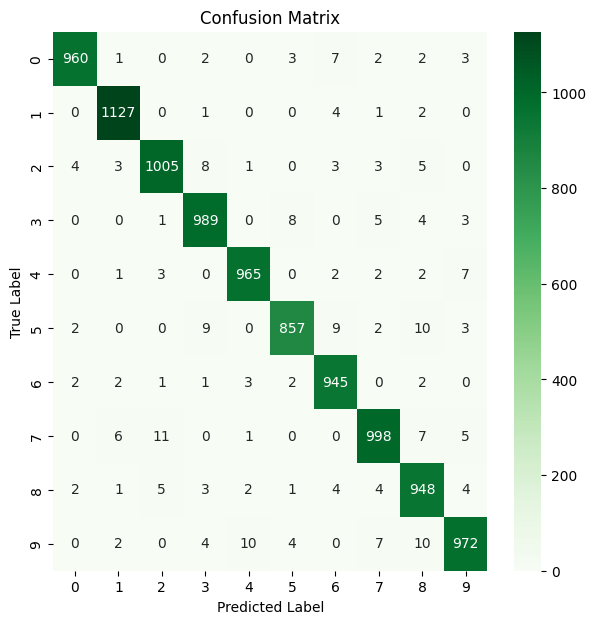

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [78]:
import tensorflow as tf

# List physical devices
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
print("GPU Details:", gpus)


Num GPUs Available:  0
GPU Details: []
